# Biophysics degeneracy

[The previous notebook](./02_biophysics.ipynb) introduced convenient methods to run predefined stimulus protocols, given some set of biphysical parameters. Here, we will explore these bipohysical parameters, and the effect they have on the cell's output.

In [1]:
import Interface as I
from getting_started import getting_started_dir
db_path = I.os.path.join(getting_started_dir, 'example_simulation_data', 'biophysics')
db = I.DataBase(db_path)
example_models = db['example_models']  # Load example biophysical models
%matplotlib inline

trying to connect to distributed locking server {'config': {'hosts': 'somalogin02-hs:33333'}, 'type': 'zookeeper'}
success!
[INFO] ISF: Current version: heads/publish+0.gd19de7d1.dirty
[INFO] ISF: Current pid: 138155
[INFO] mechanisms: Loading mechanisms:


--No graphics will be displayed.





[INFO] ISF: Loaded modules with __version__ attribute are:
IPython: 8.12.3, Interface: heads/publish+0.gd19de7d1.dirty, PIL: 8.2.0, _csv: 1.0, _ctypes: 1.1.0, _curses: b'2.2', _decimal: 1.70, argparse: 1.1, attr: 20.3.0, backcall: 0.2.0, blake3: 0.3.3, blosc: 1.10.2, bluepyopt: 1.9.126, bottleneck: 1.3.2, cffi: 1.14.3, click: 7.1.2, cloudpickle: 1.6.0, colorama: 0.4.4, comm: 0.2.1, csv: 1.0, ctypes: 1.1.0, cycler: 0.10.0, cytoolz: 0.11.0, dash: 2.9.3, dask: 2.30.0, dateutil: 2.8.2, deap: 1.3, debugpy: 1.8.0, decimal: 1.70, decorator: 4.4.2, distributed: 2.30.1, distutils: 3.8.5, executing: 2.0.1, filelock: 3.0.12, flask: 1.1.2, flask_cors: 4.0.0, frozendict: 2.3.8, fsspec: 0.8.3, future: 0.18.2, gevent: 20.9.0, greenlet: 0.4.17, ipaddress: 1.0, ipykernel: 6.29.0, ipython_genutils: 0.2.0, ipywidgets: 7.5.1, itsdangerous: 1.1.0, jedi: 0.17.1, jinja2: 3.0.3, joblib: 1.3.2, json: 2.0.9, jupyter_client: 8.6.0, jupyter_core: 5.7.1, kazoo: 2.8.0, kiwisolver: 1.3.0, llvmlite: 0.34.0, loggin

In [2]:
# init
objectives_2BAC = [
       '1BAC_APheight', '1BAC_ISI', '1BAC_ahpdepth', '1BAC_caSpike_height', 
       '1BAC_caSpike_width', '1BAC_spikecount', '2BAC_APheight', '2BAC_ISI', 
       '2BAC_ahpdepth', '2BAC_caSpike_height', '2BAC_caSpike_width', '2BAC_spikecount',
        'bAP_APheight', 'bAP_APwidth', 'bAP_att2', 'bAP_att3', 'bAP_spikecount']
params_py3 = [
       'ephys.CaDynamics_E2_v2.apic.decay',
       'ephys.CaDynamics_E2_v2.apic.gamma',
       'ephys.CaDynamics_E2_v2.axon.decay',
       'ephys.CaDynamics_E2_v2.axon.gamma',
       'ephys.CaDynamics_E2_v2.soma.decay',
       'ephys.CaDynamics_E2_v2.soma.gamma',
       'ephys.Ca_HVA.apic.gCa_HVAbar',
       'ephys.Ca_HVA.axon.gCa_HVAbar',
       'ephys.Ca_HVA.soma.gCa_HVAbar',
       'ephys.Ca_LVAst.apic.gCa_LVAstbar',
       'ephys.Ca_LVAst.axon.gCa_LVAstbar',
       'ephys.Ca_LVAst.soma.gCa_LVAstbar',
       'ephys.Im.apic.gImbar',
       'ephys.K_Pst.axon.gK_Pstbar',
       'ephys.K_Pst.soma.gK_Pstbar',
       'ephys.K_Tst.axon.gK_Tstbar',
       'ephys.K_Tst.soma.gK_Tstbar',
       'ephys.NaTa_t.apic.gNaTa_tbar',
       'ephys.NaTa_t.axon.gNaTa_tbar',
       'ephys.NaTa_t.soma.gNaTa_tbar',
       'ephys.Nap_Et2.axon.gNap_Et2bar',
       'ephys.Nap_Et2.soma.gNap_Et2bar',
       'ephys.SK_E2.apic.gSK_E2bar',
       'ephys.SK_E2.axon.gSK_E2bar',
       'ephys.SK_E2.soma.gSK_E2bar',
       'ephys.SKv3_1.apic.gSKv3_1bar',
       'ephys.SKv3_1.apic.offset',
       'ephys.SKv3_1.apic.slope',
       'ephys.SKv3_1.axon.gSKv3_1bar',
       'ephys.SKv3_1.soma.gSKv3_1bar',
       'ephys.none.apic.g_pas',
       'ephys.none.axon.g_pas',
       'ephys.none.dend.g_pas',
       'ephys.none.soma.g_pas',
       'scale_apical.scale']

## What happens if we adapt the biophysical parameters?

In [3]:
p = example_models.iloc[1][params_py3]  # let's take a different model compared to previous notebook

What would happen if we kept increasing the density of sodium at the soma?

In [4]:
varying_na = []
original_na = p[params_py3]['ephys.NaTa_t.soma.gNaTa_tbar']
for na_scale in I.np.logspace(-1, 1, num=40, base=2):
    adapted_param = p[params_py3].copy()
    adapted_param['ephys.NaTa_t.soma.gNaTa_tbar'] = original_na.copy() * na_scale
    varying_na.append(adapted_param)

In [5]:
simulator = db['89']['get_Simulator'](db['89'])

In [6]:
responses = [simulator.run(p, 'bAP')['bAP.hay_measure'] for p in varying_na]

In [7]:
def find_index_closest(array, value):
    ind = I.np.where(I.np.diff(I.np.sign(array - value)))[0][0]
    return ind

Text(0, 0.5, 'Scaling $NaTa_t$ (soma)')

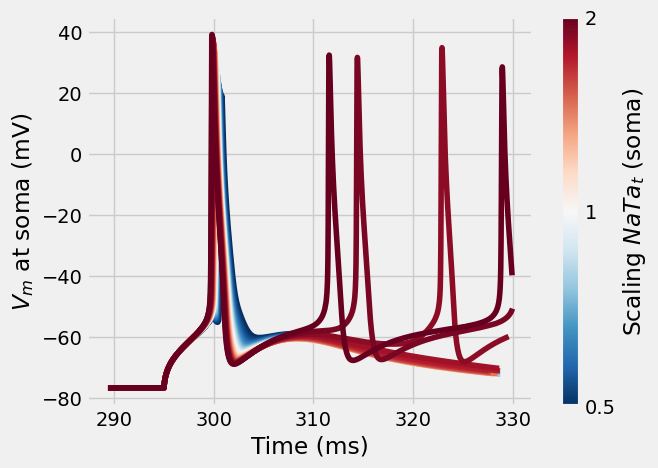

In [8]:
from matplotlib import cm, colors
I.plt.style.use("fivethirtyeight")
sodiums = [e['ephys.NaTa_t.soma.gNaTa_tbar'] for e in varying_na]
norm = colors.LogNorm(vmax=sodiums[-1], vmin=sodiums[0])
cbar = cm.ScalarMappable(norm=norm, cmap=cm.RdBu_r)

t_min, t_max = 290, 330
fig, ax = I.plt.subplots()
for response, param in zip(responses, varying_na):
    start, stop = find_index_closest(response['tVec'], t_min), find_index_closest(response['tVec'], t_max)
    ax.plot(
        response['tVec'][start:stop], 
        response['vList'][0][start:stop], 
        c=cbar.to_rgba(param['ephys.NaTa_t.soma.gNaTa_tbar']))
ax.set_xlabel("Time (ms)")
ax.set_ylabel("$V_m$ at soma (mV)")

colorbar = I.plt.colorbar(
    cbar, 
    ticks=[sodiums[0], original_na, sodiums[-1]])
colorbar.minorticks_off()
colorbar.set_ticklabels(('0.5', '1', '2'))
colorbar.ax.set_ylabel("Scaling $NaTa_t$ (soma)")

We see how increasing (decreasing) the density of $NaTa_t$ channels at the soma:
- makes the AHP depth deeper (more shallow)
- makes the AP height higher (lower)
- Makes the cell start burst firing after a while

In [15]:
from biophysics_fitting.hay_complete_default_setup import get_hay_problem_description
obj = get_hay_problem_description()
AP_obj = obj[obj['feature'] == 'AP_height'].iloc[0]
m_ap, std_ap = AP_obj['mean'], AP_obj['std']

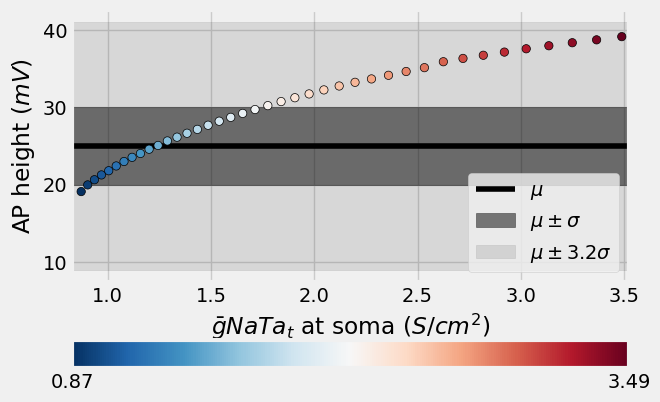

In [67]:
ax = I.plt.scatter(
    sodiums,
    [I.np.max(r['vList']) for r in responses],
    c=cbar.to_rgba(sodiums),
    zorder=2,
    linewidth=.5,
    edgecolors='k'
)
I.plt.xlabel("$\\bar{g}NaTa_t$ at soma ($S/cm^2$)")
I.plt.ylabel("AP height ($mV$)")

# plot average AP height and std

I.plt.fill_between(
    (0, 4),
    m_ap - std_ap,
    m_ap+std_ap, 
    zorder=1, color='k', alpha=.5, label="$\mu \pm \sigma$")
I.plt.fill_between(
    (0, 4),
    m_ap - 3.2*std_ap,
    m_ap+3.2*std_ap, 
    zorder=1, color='k', alpha=.1, label="$\mu \pm 3.2\sigma$")
I.plt.axhline(m_ap, color='k', zorder=1, label="$\mu$")
I.plt.xlim(min(sodiums)*.95, max(sodiums)*1.01)
I.plt.legend(loc='lower right')

# colorbar
colorbar = I.plt.colorbar(
    cbar, 
    ticks=[sodiums[0], sodiums[-1]],
    orientation="horizontal")
colorbar.minorticks_off()
colorbar.set_ticklabels((round(min(sodiums), 2), round(max(sodiums), 2)))

Rather unsurprisingly, there is a relationship between the density of sodium channels at the soma and the AP height.

As far as the AP height is concerned, all models are well within the $3.2\sigma$ bound. Of course, AP height is not the only objective a model needs to adhere to in order to be considered "biologically plausible". There are many objectives a good biphysical model needs to adhere to, for $5$ different stimulus protocols:

In [51]:
obj

,feature,mean,objective,std,stim_name,stim_type
0,Spikecount,1.0000,bAP_spikecount,0.0100,bAP,bAP
1,AP_height,25.0000,bAP_APheight,5.0000,bAP,bAP
2,AP_width,2.0000,bAP_APwidth,0.5000,bAP,bAP
3,BPAPatt2,45.0000,bAP_att2,10.0000,bAP,bAP
4,BPAPatt3,36.0000,bAP_att3,9.3300,bAP,bAP
5,AHP_depth_abs,-65.0000,BAC_ahpdepth,4.0000,BAC,BAC
6,AP_height,25.0000,BAC_APheight,5.0000,BAC,BAC
7,BAC_ISI,9.9010,BAC_ISI,0.8517,BAC,BAC
8,BAC_caSpike_height,6.7300,BAC_caSpike_height,2.5400,BAC,BAC
9,BAC_caSpike_width,37.4300,BAC_caSpike_width,1.2700,BAC,BAC


As we have seen before, the models with very high $\bar{g}NaTa_t$ may still be within bounds for AP height, but they start burst firing when they shouldn't. How do we check all $40$ objectives at once, rather than one at a time? With the [Evaluator](../../../biophysics_fitting/evaluator.py) of course!

## Exploring viable biophysical models

TODO: MOOA and random walk